In [6]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
import pandas as pd

In [11]:
pkl = '../tmp/8035_2024-05-16.pkl'

In [12]:
df = pd.read_pickle(pkl)
df

,Price
2024-05-16 09:03:07,"36,570"
2024-05-16 09:03:17,"36,750"
2024-05-16 09:03:26,"36,710"
2024-05-16 09:03:36,"36,690"
2024-05-16 09:03:47,"36,680"
...,...
2024-05-16 14:59:27,"36,790"
2024-05-16 14:59:37,"36,800"
2024-05-16 14:59:47,"36,820"
2024-05-16 14:59:57,"36,790"


In [13]:
date_str = str(df.index[0].date())
time_left = pd.to_datetime(date_str + ' 08:50:00')
time_mid = pd.to_datetime(date_str + ' 12:00:00')
time_right = pd.to_datetime(date_str + ' 15:10:00')
print(time_left, time_mid, time_right)

2024-05-16 08:50:00 2024-05-16 12:00:00 2024-05-16 15:10:00


In [14]:
df['Price'].str.replace(',', '').astype(float)

2024-05-16 09:03:07    36570.0
2024-05-16 09:03:17    36750.0
2024-05-16 09:03:26    36710.0
2024-05-16 09:03:36    36690.0
2024-05-16 09:03:47    36680.0
                        ...   
2024-05-16 14:59:27    36790.0
2024-05-16 14:59:37    36800.0
2024-05-16 14:59:47    36820.0
2024-05-16 14:59:57    36790.0
2024-05-16 15:00:00    36820.0
Name: Price, Length: 1685, dtype: float64

In [15]:
df1 = df.loc[df.index[df.index < time_mid]]
df2 = df.loc[df.index[df.index > time_mid]]

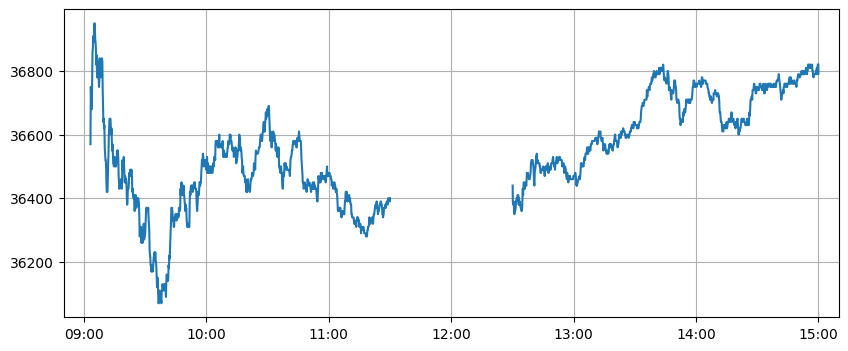

In [16]:
plt.rcParams["figure.figsize"] = (10, 4)
fig, ax = plt.subplots()

ax.plot(df1['Price'].str.replace(',', '').astype(float), c='C0')
ax.plot(df2['Price'].str.replace(',', '').astype(float), c='C0')
ax.set_xlim(time_left, time_right)

plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.grid()
plt.show()